In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit

In [11]:
df = pd.read_csv("data.csv")
df = df.dropna(axis=1, how='all')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
def data_checks(dataframe:pd.DataFrame):
        """
        perform checks in the dataset

        args:
            df (pd.DataFrame): the DataFrame which we are performing checks

        returns:
            dictionary of checks

        """
        checks = {
            "info":dataframe.info(),
            "shape":dataframe.shape,
            "uniqueness":dataframe.apply(lambda x: len(x.unique())).sort_values(ascending=False).head(10),
            "missing_values":dataframe.isnull().sum(),
            "duplicates":dataframe.duplicated().sum(),
            "data_snapshot":dataframe.head()

        }
        return checks
data_checks(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

{'info': None,
 'shape': (569, 33),
 'uniqueness': id                      569
 smoothness_se           547
 fractal_dimension_se    545
 area_worst              544
 concave points_mean     542
 compactness_se          541
 radius_se               540
 area_mean               539
 concavity_worst         539
 compactness_mean        537
 dtype: int64,
 'missing_values': id                           0
 diagnosis                    0
 radius_mean                  0
 texture_mean                 0
 perimeter_mean               0
 area_mean                    0
 smoothness_mean              0
 compactness_mean             0
 concavity_mean               0
 concave points_mean          0
 symmetry_mean                0
 fractal_dimension_mean       0
 radius_se                    0
 texture_se                   0
 perimeter_se                 0
 area_se                      0
 smoothness_se                0
 compactness_se               0
 concavity_se                 0
 concave points_se 

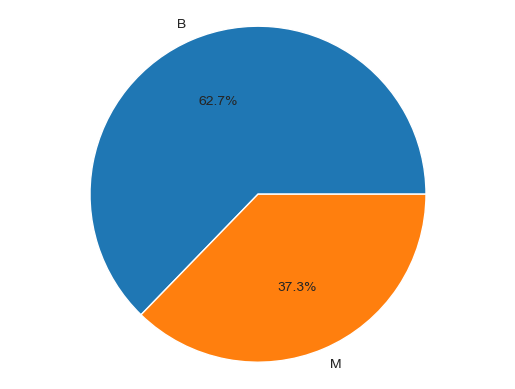

In [14]:
counts = df['diagnosis'].value_counts()
plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
plt.axis('equal')
plt.show()

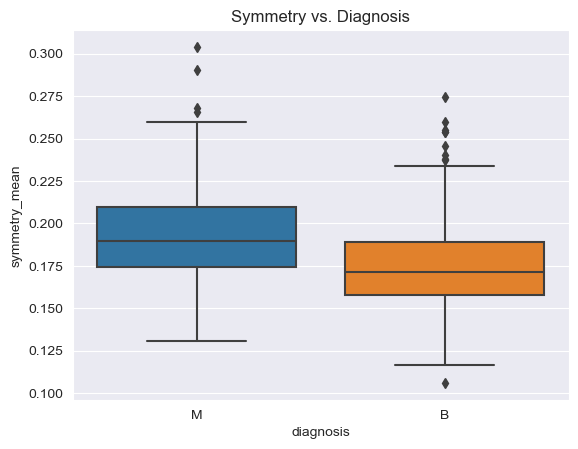

In [15]:
sns.boxplot(x='diagnosis', y='symmetry_mean', data=df)
plt.title('Symmetry vs. Diagnosis')
plt.show()

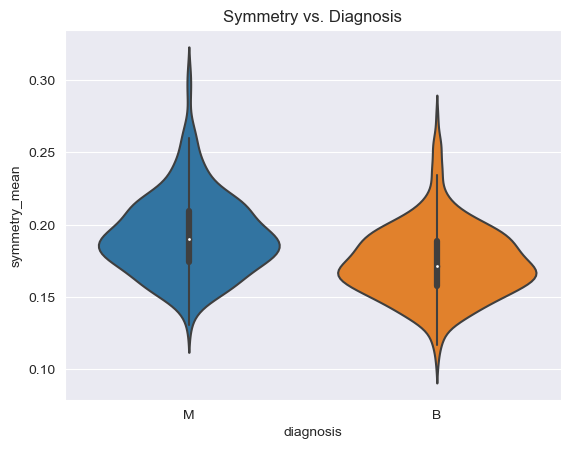

In [16]:
sns.violinplot(x='diagnosis', y='symmetry_mean', data=df)
plt.title('Symmetry vs. Diagnosis')
plt.show()

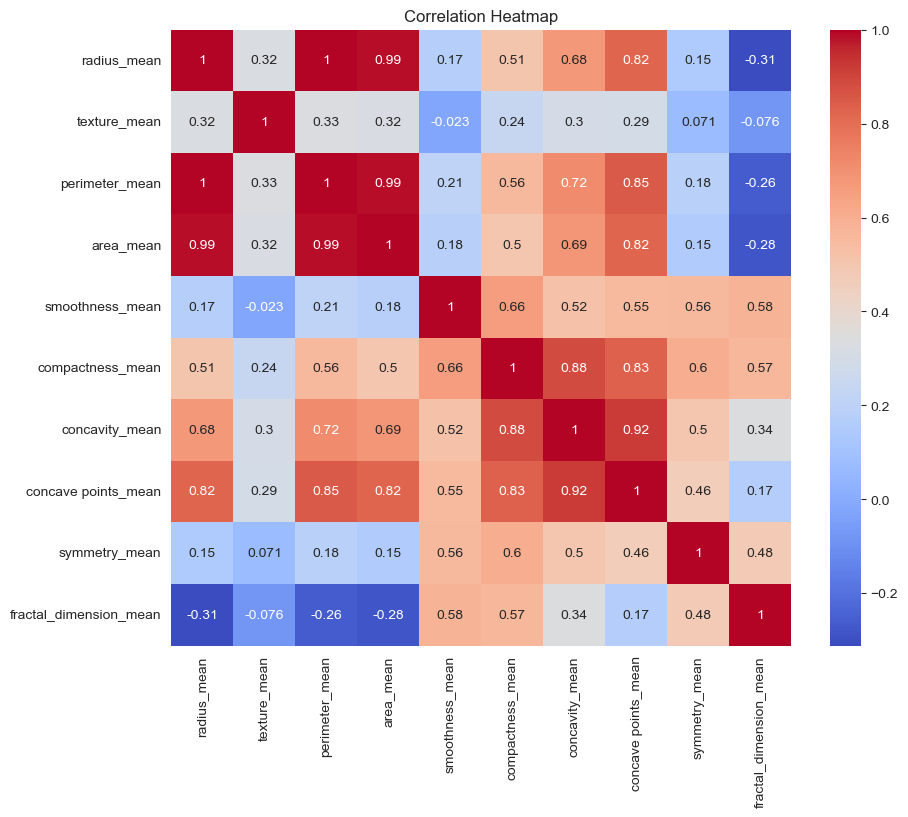

In [23]:
subset_df = df.iloc[:, 2:12]
corr_matrix = subset_df.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')

plt.show()